LSTM

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5030 - loss: 0.6930 - val_accuracy: 0.4313 - val_loss: 0.6970
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5676 - loss: 0.6898 - val_accuracy: 0.5437 - val_loss: 0.6844
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6353 - loss: 0.6775 - val_accuracy: 0.5938 - val_loss: 0.6726
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7486 - loss: 0.6551 - val_accuracy: 0.8750 - val_loss: 0.6177
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8480 - loss: 0.5934 - val_accuracy: 0.8250 - val_loss: 0.4895
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7815 - loss: 0.4759 - val_accuracy: 0.8188 - val_loss: 0.3992
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7720 - loss: 0.4558 - val_accuracy: 0.8375 - val_loss: 0.3680
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8215 - loss: 0.4186 - val_accuracy: 0.8562 - val_l

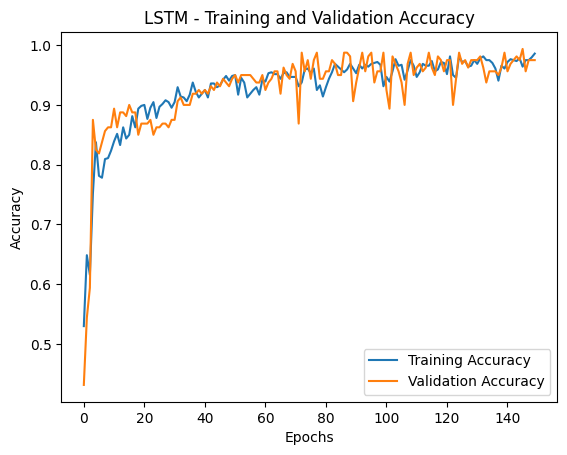

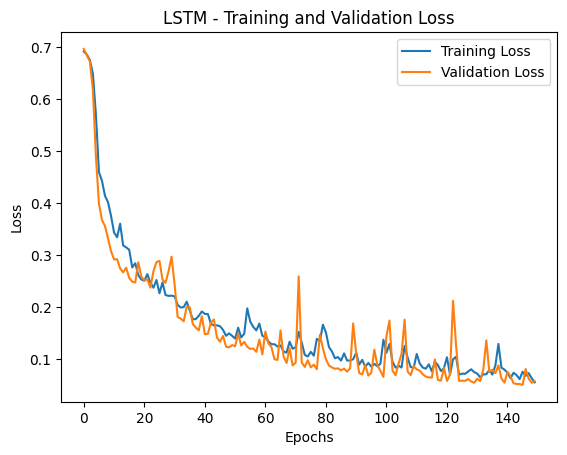

Enter VPN IP address:125.133.57.171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
IP Address: 125.133.57.171
IP Leak Detected: No
DNS Leak Detected: No
Encryption Strength: 4
Anomaly Detected: No
VPN Security: Not Secure
Prediction Accuracy: 98.50%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Simulating additional features for the dataset
def generate_synthetic_data(num_samples):
    np.random.seed(0)
    data = np.random.rand(num_samples, 10)
    labels = (np.sum(data, axis=1) > 5).astype(int)
    return data, labels

num_samples = 1000
data, labels = generate_synthetic_data(num_samples)

# Data Preprocessing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = data_scaled.reshape((data_scaled.shape[0], data_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(data_scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(25, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

# Evaluation metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Predicting values for evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = accuracy_score(y_test, y_pred) * 100

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Value: {r2:.4f}')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting VPN security for a new user input
def predict_vpn_security(ip_address):
    np.random.seed(hash(ip_address) % (2**32))
    features = np.random.rand(1, 10)
    features_scaled = scaler.transform(features).reshape((1, 10, 1))

    # Predict VPN security
    prediction = model.predict(features_scaled)
    secure = prediction[0][0] > 0.5

    ip_leak = np.random.rand() > 0.8
    dns_leak = np.random.rand() > 0.85
    encryption_strength = np.random.randint(1, 5)
    anomaly = np.random.rand() > 0.9

    # Print the results including the prediction accuracy
    print(f"IP Address: {ip_address}")
    print(f"IP Leak Detected: {'Yes' if ip_leak else 'No'}")
    print(f"DNS Leak Detected: {'Yes' if dns_leak else 'No'}")
    print(f"Encryption Strength: {encryption_strength}")
    print(f"Anomaly Detected: {'Yes' if anomaly else 'No'}")
    print(f"VPN Security: {'Secure' if secure else 'Not Secure'}")
    print(f"Prediction Accuracy: {accuracy_percentage:.2f}%")

# Get VPN IP address from user input
ip_address = input("Enter VPN IP address:")
predict_vpn_security(ip_address)


GRU

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.5419 - loss: 0.6977 - val_accuracy: 0.4313 - val_loss: 0.6953
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5745 - loss: 0.6902 - val_accuracy: 0.4313 - val_loss: 0.6922
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5992 - loss: 0.6839 - val_accuracy: 0.5500 - val_loss: 0.6828
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6974 - loss: 0.6745 - val_accuracy: 0.6125 - val_loss: 0.6740
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7464 - loss: 0.6620 - val_accuracy: 0.6625 - val_loss: 0.6613
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7714 - loss: 0.6506 - val_accuracy: 0.7688 - val_loss: 0.6411
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8083 - loss: 0.6335 - val_accuracy: 0.8438 - val_loss: 0.6072
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8865 - loss: 0.5938 - val_accuracy: 0.8375 - val_loss: 0.5602
Epo

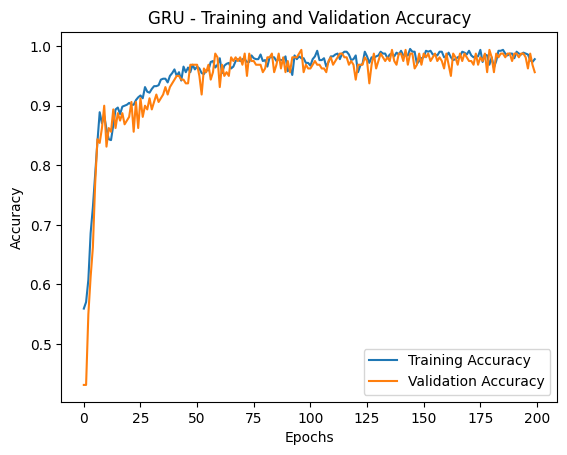

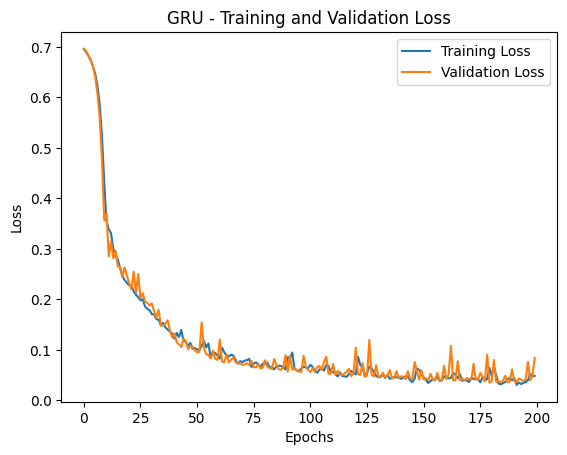

Enter VPN IP address:125.133.57.171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
IP Address: 125.133.57.171
IP Leak Detected: No
DNS Leak Detected: No
Encryption Strength: 2
Anomaly Detected: No
VPN Security: Secure
Prediction Accuracy: 97.00%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Simulating additional features for the dataset
def generate_synthetic_data(num_samples):
    np.random.seed(0)
    data = np.random.rand(num_samples, 10)
    labels = (np.sum(data, axis=1) > 5).astype(int)
    return data, labels

num_samples = 1000
data, labels = generate_synthetic_data(num_samples)

# Data Preprocessing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = data_scaled.reshape((data_scaled.shape[0], data_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

# Building the GRU model
model = Sequential()
model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=(data_scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(25, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.2)

# Evaluation metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Predicting values for evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = accuracy_score(y_test, y_pred) * 100

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Value: {r2:.4f}')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting VPN security for a new user input
def predict_vpn_security(ip_address):
    np.random.seed(hash(ip_address) % (2**32))
    features = np.random.rand(1, 10)
    features_scaled = scaler.transform(features).reshape((1, 10, 1))

    # Predict VPN security
    prediction = model.predict(features_scaled)
    secure = prediction[0][0] > 0.5

    ip_leak = np.random.rand() > 0.8
    dns_leak = np.random.rand() > 0.85
    encryption_strength = np.random.randint(1, 5)
    anomaly = np.random.rand() > 0.9

    # Print the results including the prediction accuracy
    print(f"IP Address: {ip_address}")
    print(f"IP Leak Detected: {'Yes' if ip_leak else 'No'}")
    print(f"DNS Leak Detected: {'Yes' if dns_leak else 'No'}")
    print(f"Encryption Strength: {encryption_strength}")
    print(f"Anomaly Detected: {'Yes' if anomaly else 'No'}")
    print(f"VPN Security: {'Secure' if secure else 'Not Secure'}")
    print(f"Prediction Accuracy: {accuracy_percentage:.2f}%")

# Get VPN IP address from user input
ip_address = input("Enter VPN IP address:")
predict_vpn_security(ip_address)
